In [1]:
import json
import pandas as pd
from yelpapi import YelpAPI

In [2]:
with open("/Users/James/OneDrive/Desktop/yelp_api.json") as f:
    login = json.load(f)
login.keys()

dict_keys(['client-id', 'api-key'])

In [3]:
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)
yelp_api

In [4]:
results = yelp_api.search_query(location='San Francisco, CA',
                                       term='Sushi')
type(results)
results.keys()

dict_keys(['businesses', 'total', 'region'])

In [5]:
# Assuming 'results' is the dictionary you obtained from the Yelp API
businesses = results['businesses']

# Iterate through each business and print relevant information
for business in businesses:
    name = business['name']
    rating = business['rating']
    address = ', '.join(business['location']['display_address'])

    print(f"Name: {name}")
    print(f"Rating: {rating}")
    print(f"Address: {address}")
    print("\n")

Name: Toyama Sushi
Rating: 4.5
Address: 3727 Geary Blvd, San Francisco, CA 94118


Name: Nara Restaurant & Sake Bar
Rating: 4.5
Address: 518 Haight St, San Francisco, CA 94117


Name: Saru Sushi Bar
Rating: 4.5
Address: 3856 24th St, San Francisco, CA 94114


Name: Kazan
Rating: 4.5
Address: 2809 24th St, San Francisco, CA 94110


Name: Okaeri Japanese Bistro
Rating: 4.5
Address: 3515 20th St, San Francisco, CA 94110


Name: Ebisu
Rating: 4.0
Address: 1283 9th Ave, San Francisco, CA 94122


Name: Big Fish House
Rating: 5.0
Address: 2109 Clement St, San Francisco, CA 94121


Name: Little Sushi Bar
Rating: 4.5
Address: 200 23rd Ave, San Francisco, CA 94121


Name: Oishinbo Sushi
Rating: 4.5
Address: 202 Clement St, San Francisco, CA 94118


Name: Rocket Sushi
Rating: 4.5
Address: 1695 Market St, San Francisco, CA 94103


Name: Sushi Goemon
Rating: 4.5
Address: 1524 Irving St, San Francisco, CA 94122


Name: Tataki
Rating: 4.0
Address: 2827 California St, San Francisco, CA 94115


Name: H

C:\Users\James\AppData\Local\Temp\ipykernel_4516\3420659559.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


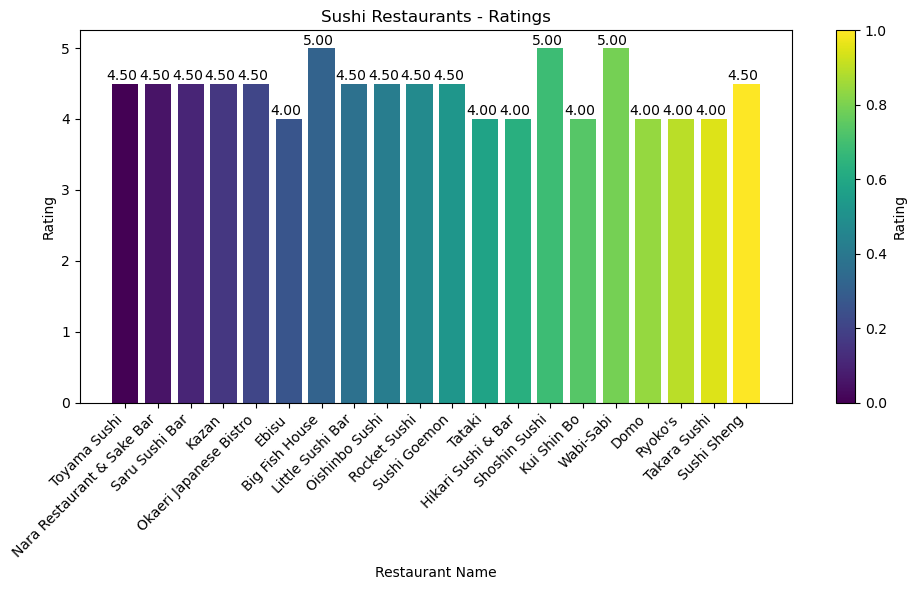

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'businesses' is the list of businesses from the Yelp API response
names = [business['name'] for business in businesses]
ratings = [business['rating'] for business in businesses]

# Define a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(ratings)))

# Plotting the bar graph with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(names, ratings, color=colors)
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.title('Sushi Restaurants - Ratings')
plt.xticks(rotation=45, ha='right')

# Add a colorbar to show the mapping of ratings to colors
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cbar.set_label('Rating')

# Add labels to each bar with the corresponding rating
for bar, rating in zip(bars, ratings):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{rating:.2f}', ha='center')

plt.tight_layout()
plt.show()